In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os
import datetime
import seaborn as sns
import pandas as pd
import cProfile
from matplotlib.mlab import PCA
from implementations import *
from costs import *
from helpers import *
from proj1_helpers import *
from method_comparison_helpers import *
%load_ext autoreload
%autoreload 2

ImportError: No module named 'seaborn'

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
# Load Train and Test Data
with zipfile.ZipFile("../data/test.csv.zip","r") as zip_ref:
    zip_ref.extractall("../data/")
DATA_TRAIN_PATH = '../data/train.csv' 
y, tx, ids = load_csv_data(DATA_TRAIN_PATH)

split_ratio = 0.2
tx_train, tx_test, y_train, y_test = split_data(tx, y, split_ratio)
print(tx_train.shape, y_train.shape)
print(tx_test.shape, y_test.shape)

NameError: name 'load_csv_data' is not defined

In [3]:
# and prediction data
DATA_PRED_PATH = '../data/test.csv'
_, tx_pred, ids_pred = load_csv_data(DATA_PRED_PATH)

## Exploratory data analysis

In [4]:
# Lets load it into Pandas data frame since it is easier for data analysis
original_df = pd.DataFrame(tx_train)
columns = original_df.columns.to_series()
sparse_columns = np.array([])
for i, column in columns.iteritems():
    value_counts = original_df[original_df.columns[column]].value_counts()
    if -999 in value_counts:
        sparse_columns = np.append(sparse_columns, [column])
# Lets replace -999 values for nan's
replaced999_df = original_df.replace(-999, np.nan)

In [5]:
copy_df = replaced999_df.copy()
copy_df.fillna(-99, inplace=True)

In [6]:
def power_of_2(x):
    # that, if x is a string,
    if type(x) is str:
        # just returns it untouched
        return x
    # but, if not, return it multiplied by 100
    elif x:
        return x * x
    # and leave everything else
    else:
        x
        
import itertools

def permutation(df, list_a, list_b):
    perms = list(itertools.product(list_a, list_b))
    for element in perms:
        perm_name = element[0] + '_x_' + element[1]
        df[perm_name] = df[element[0]] * df[element[1]]
        


In [7]:
# If you want to do permuatations of all columns you can:
# columns_list = list(replaced999_df.columns.values)
# columns_list = [str(x) for x in columns_list]
# permutation(df, columns_list, columns_list)

In [8]:
# EXPLORATORY DATASET 1
# mean_filled_df - Dataset for which NaN's values were replaced by mean of column
mean_filled_df = replaced999_df.copy()
for i, column in np.ndenumerate(sparse_columns):
    col_mean = mean_filled_df[column].mean()
    mean_filled_df[column] = mean_filled_df[column].fillna(col_mean)
# mean_filled_normalized_df - mean_filled_df where mean value of colum was also subtracted for each element in same column
mean_filled_normalized_df = (mean_filled_df - mean_filled_df.mean()) / mean_filled_df.std()

In [9]:
# EXPLORATORY DATASET 2
# zero_filled_df - Dataset for which NaN's values were replaced by 0
zero_filled_df = replaced999_df.fillna(0)
# zero_filled_normalized_df - zero_filled_df where mean value of colum was also subtracted for each element in same column
zero_filled_normalized_df = (zero_filled_df - zero_filled_df.mean()) / zero_filled_df.std()

In [10]:
# EXPLORATORY DATASET 3
# Lets sum all sprase columns and combine it into new one
combined_df = replaced999_df.copy()
combined_df['combined'] = replaced999_df[sparse_columns].sum(axis=1)
# and drop those nan columns leaving combined
droped_nans_df = combined_df.dropna(axis=1, thresh=50000)
# normalized_df - droped_nans_df where mean value of colum was also subtracted for each element in same column
normalized_df = (droped_nans_df - droped_nans_df.mean()) / droped_nans_df.std()

In [11]:
# EXPLORATORY 4
# instead of -999 we have -99
ninefilled_normalized_df = (copy_df - copy_df.mean()) / copy_df.std()
ninefilled_tx_train = ninefilled_normalized_df.as_matrix()

In [12]:
# Exploratory DATASET 5
# normalized -5 filled dataset with base dimensions, 
# (base dimensions)^2 and permutatons of dimensions which are highly corelated 
squared_df = replaced999_df.copy()
squared_df = squared_df.applymap(power_of_2)
squared_df = replaced999_df.join(squared_df, how='outer', rsuffix='_squared')
squared_df_normalized = (squared_df - squared_df.mean()) / squared_df.std()
squared_df.fillna(-5, inplace=True) # best for -5
squared_df_normalized.fillna(-5, inplace=True) # best for -5
permutation(squared_df, ['0'], ['1','2','7','8'])
permutation(squared_df, ['4'], ['5','6'])
permutation(squared_df, ['10'], ['16'])
permutation(squared_df, ['21'], ['23', '26', '29'])
permutation(squared_df, ['23'], ['26', '29'])
permutation(squared_df_normalized, ['0'], ['1','2','7','8'])
permutation(squared_df_normalized, ['4'], ['5','6'])
permutation(squared_df_normalized, ['10'], ['16'])
permutation(squared_df_normalized, ['21'], ['23', '26', '29'])
permutation(squared_df_normalized, ['23'], ['26', '29'])
squared_df.shape

(50000, 72)

In [13]:
# Lets do exactly the same but for test dataset
original_test_df = pd.DataFrame(tx_test)
replaced999_test_df = original_test_df.replace(-999, np.nan)
squared_test_df = replaced999_test_df.copy()
copy_test_df = replaced999_test_df.copy()
copy_test_df.fillna(-99, inplace=True)
mean_filled_test_df = replaced999_test_df.copy()
for i, column in np.ndenumerate(sparse_columns):
    col_mean = mean_filled_test_df[column].mean()
    mean_filled_test_df[column] = mean_filled_test_df[column].fillna(col_mean)
mean_filled_normalized_test_df = (mean_filled_test_df - mean_filled_test_df.mean()) / mean_filled_test_df.std()
combined_test_df = replaced999_test_df.copy()
combined_test_df['combined'] = combined_test_df[sparse_columns].sum(axis=1)
droped_nans_test_df = combined_test_df.dropna(axis=1, thresh=200000)
normalized_test_df = (droped_nans_test_df - droped_nans_test_df.mean()) / droped_nans_test_df.std()

squared_test_df = squared_test_df.applymap(power_of_2)
squared_test_df = replaced999_test_df.join(squared_test_df, how='outer', rsuffix='_squared')
squared_test_df_normalized = (squared_test_df - squared_test_df.mean()) / squared_test_df.std()
squared_test_df.fillna(-5, inplace=True)
squared_test_df_normalized.fillna(-5, inplace=True)
permutation(squared_test_df, ['0'], ['1','2','7','8'])
permutation(squared_test_df, ['4'], ['5','6'])
permutation(squared_test_df, ['10'], ['16'])
permutation(squared_test_df, ['21'], ['23', '26', '29'])
permutation(squared_test_df, ['23'], ['26', '29'])
permutation(squared_test_df_normalized, ['0'], ['1','2','7','8'])
permutation(squared_test_df_normalized, ['4'], ['5','6'])
permutation(squared_test_df_normalized, ['10'], ['16'])
permutation(squared_test_df_normalized, ['21'], ['23', '26', '29'])
permutation(squared_test_df_normalized, ['23'], ['26', '29'])

ninefilled_test_normalized_df = (copy_test_df - copy_test_df.mean()) / copy_test_df.std()
ninefilled_tx_test = ninefilled_test_normalized_df.as_matrix()

zero_filled_test_df = replaced999_test_df.fillna(0)
zero_filled_test_normalized_df = (zero_filled_test_df - zero_filled_test_df.mean()) / zero_filled_test_df.std()

In [14]:
# and prediction dataset
original_pred_df = pd.DataFrame(tx_pred)
replaced999_pred_df = original_pred_df.replace(-999, np.nan)
squared_pred_df = replaced999_pred_df.copy()
copy_pred_df = replaced999_pred_df.copy()
copy_pred_df.fillna(-99, inplace=True)
mean_filled_pred_df = replaced999_pred_df.copy()
for i, column in np.ndenumerate(sparse_columns):
    col_mean = mean_filled_pred_df[column].mean()
    mean_filled_pred_df[column] = mean_filled_pred_df[column].fillna(col_mean)
mean_filled_normalized_pred_df = (mean_filled_pred_df - mean_filled_pred_df.mean()) / mean_filled_pred_df.std()
combined_pred_df = replaced999_pred_df.copy()
combined_pred_df['combined'] = combined_pred_df[sparse_columns].sum(axis=1)
droped_nans_pred_df = combined_pred_df.dropna(axis=1, thresh=500000)
normalized_pred_df = (droped_nans_pred_df - droped_nans_pred_df.mean()) / droped_nans_pred_df.std()

squared_pred_df = squared_pred_df.applymap(power_of_2)
squared_pred_df = replaced999_pred_df.join(squared_pred_df, how='outer', rsuffix='_squared')
squared_pred_df_normalized = (squared_pred_df - squared_pred_df.mean()) / squared_pred_df.std()
squared_pred_df.fillna(-5, inplace=True)
squared_pred_df_normalized.fillna(-5, inplace=True)
permutation(squared_pred_df, ['0'], ['1','2','7','8'])
permutation(squared_pred_df, ['4'], ['5','6'])
permutation(squared_pred_df, ['10'], ['16'])
permutation(squared_pred_df, ['21'], ['23', '26', '29'])
permutation(squared_pred_df, ['23'], ['26', '29'])
permutation(squared_pred_df_normalized, ['0'], ['1','2','7','8'])
permutation(squared_pred_df_normalized, ['4'], ['5','6'])
permutation(squared_pred_df_normalized, ['10'], ['16'])
permutation(squared_pred_df_normalized, ['21'], ['23', '26', '29'])
permutation(squared_pred_df_normalized, ['23'], ['26', '29'])

ninefilled_pred_normalized_df = (copy_test_df - copy_test_df.mean()) / copy_test_df.std()
ninefilled_tx_pred = ninefilled_pred_normalized_df.as_matrix()

zero_filled_pred_df = replaced999_pred_df.fillna(0)
zero_filled_pred_normalized_df = (zero_filled_pred_df - zero_filled_pred_df.mean()) / zero_filled_pred_df.std()

In [15]:
# Lets change it back to numpy array

# train datasets
new_meanfilled_tx_train = mean_filled_normalized_df.as_matrix() # DATASET 1
new_zerofilled_tx_train = zero_filled_normalized_df.as_matrix()[:,0:30] # DATASET 2
new_tx_train = normalized_df.as_matrix() # DATASET 3
squared_tx_train = squared_df.as_matrix() # DATASET 5.1
squared_tx_normalized_train = squared_df_normalized.as_matrix() # DATASET 5.2

squared_datasets = [squared_tx_train, squared_tx_normalized_train]
train_datasets = [tx_train, new_meanfilled_tx_train, new_zerofilled_tx_train, new_tx_train, ninefilled_tx_train]
new_train_datasets = [new_meanfilled_tx_train, new_zerofilled_tx_train, new_tx_train, ninefilled_tx_train]

# test datasets
new_meanfilled_tx_test = mean_filled_normalized_test_df.as_matrix() # DATASET 1
new_zerofilled_tx_test = zero_filled_test_normalized_df.as_matrix()[:,0:30] # DATASET 2
new_tx_test = normalized_test_df.as_matrix() # DATASET 3
squared_tx_test = squared_test_df.as_matrix() # DATASET 5.1
squared_tx_normalized_test = squared_test_df_normalized.as_matrix() # DATASET 5.2

squared_test_datasets = [squared_tx_test, squared_tx_normalized_test]
test_datasets = [tx_test, new_meanfilled_tx_test, new_zerofilled_tx_test, new_tx_test, ninefilled_tx_test]
new_test_datasets = [new_meanfilled_tx_test, new_zerofilled_tx_test, new_tx_test, ninefilled_tx_test]

# prediction datasets
new_meanfilled_tx_pred = mean_filled_normalized_pred_df.as_matrix() # DATASET 1
new_zerofilled_tx_pred = zero_filled_pred_normalized_df.as_matrix()[:,0:30] # DATASET 2
new_tx_pred = normalized_pred_df.as_matrix() # DATASET 3
squared_tx_pred = squared_pred_df.as_matrix() # DATASET 5.1
squared_tx_normalized_pred = squared_pred_df_normalized.as_matrix() # DATASET 5.2

squared_pred_datasets = [squared_tx_pred, squared_tx_normalized_pred]
pred_datasets = [tx_pred, new_meanfilled_tx_pred, new_zerofilled_tx_pred, new_tx_pred, ninefilled_tx_pred]
new_pred_datasets = [new_meanfilled_tx_pred, new_zerofilled_tx_pred, new_tx_pred, ninefilled_tx_pred]

squared_datasets_names = ['Squared', 'Squared Normalized']
datasets_names = ['Original/Raw', 'Mean filled', 'Zero filled', 'NaN dropped', '-99 filled']
new_datasets_names = ['Mean filled', 'Zero filled', 'NaN dropped', '-99 filled']

## Logistic Regression

In [16]:
#Parameters 
max_iters = 1000
gammas = np.logspace(-12, -11, 10)

In [17]:
print(y_train.shape)
print(y_test.shape)
print(squared_tx_normalized_train.shape)
print(squared_tx_normalized_test.shape)

(50000,)
(200000,)
(50000, 72)
(200000, 72)


Logistic Regression for Squared Normalized: execution time=43.202 seconds.


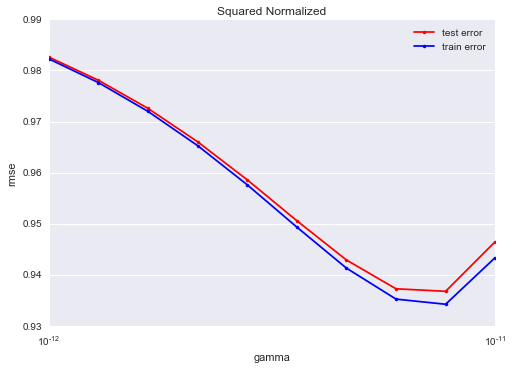

In [18]:
train, test, weight = logistic_regression_dataset_gammas_test(y_train, y_test, squared_tx_normalized_train, squared_tx_normalized_test, max_iters, gammas, 'Squared Normalized', 1)

In [19]:
gamma = 0.8e-11
max_iters = 1000
logistic_regression_dataset_single_gamma_test(y_train, y_test, squared_tx_normalized_train, squared_tx_normalized_test, max_iters, gamma, 'Squared Normalized')

Logistic Regression for Squared Normalized: execution time=4.126 seconds.


(0.934763277324825,
 0.9373634980186919,
 array([  3.96456832e-04,  -1.29496269e-04,  -4.53785480e-06,
          6.62572277e-05,   1.24401389e-03,   1.24300203e-03,
          1.17342901e-03,   8.41288583e-06,  -9.79644488e-06,
          4.92624762e-05,  -7.31556278e-05,   9.88184521e-05,
          1.24161491e-03,   8.46076724e-05,  -5.91153261e-07,
          1.79168399e-06,  -1.35231574e-05,  -1.71883941e-07,
          1.41786930e-06,   3.21233737e-06,   1.56076930e-06,
          4.38176713e-05,   3.95472255e-05,   7.60431001e-04,
          7.38723321e-04,   7.37915075e-04,   1.20437243e-03,
          1.20621461e-03,   1.20436393e-03,   4.14629840e-05,
          3.71941779e-04,  -7.98876637e-05,  -2.57525709e-05,
          4.93870803e-05,   1.24656404e-03,   1.23602911e-03,
          1.23484640e-03,  -2.10679664e-06,  -5.61451828e-06,
          2.75052828e-05,  -3.97571713e-05,   2.12326455e-05,
          1.34581298e-03,   4.41417289e-05,  -4.19184110e-05,
         -3.73660774e-07,  -8

Logistic Regression for Squared: execution time=45.005 seconds.
Logistic Regression for Squared Normalized: execution time=46.686 seconds.


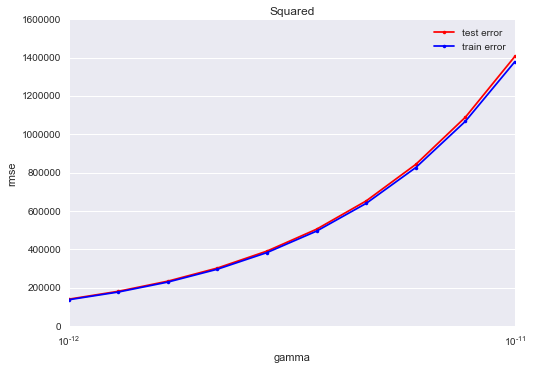

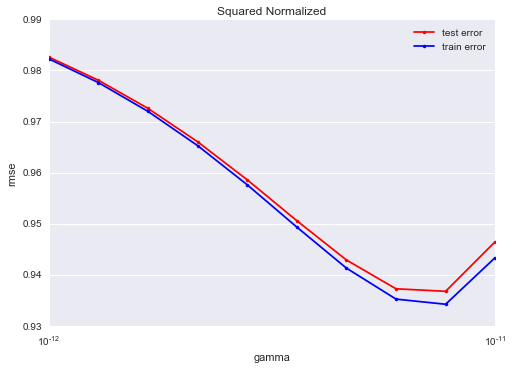

In [20]:
# Logistic Regression of all datasets vs gammas. 
# WARNING Takes a lot of time for all datasets (~30 min)

for i in range(len(squared_datasets)):
    # Parameters
    train_dataset = squared_datasets[i]
    test_dataset = squared_test_datasets[i]
    dataset_name = squared_datasets_names[i]
    figure_id = i
    
    logistic_regression_dataset_gammas_test(y_train, y_test, train_dataset, test_dataset, max_iters, gammas, dataset_name, figure_id)

In [21]:
# Parameters
max_iters = 1000
gamma = 1e-16

Logistic Regression for Original/Raw: execution time=2.812 seconds.
Logistic Regression for Mean filled: execution time=2.822 seconds.
Logistic Regression for Zero filled: execution time=2.593 seconds.
Logistic Regression for NaN dropped: execution time=2.130 seconds.
Logistic Regression for -99 filled: execution time=2.612 seconds.


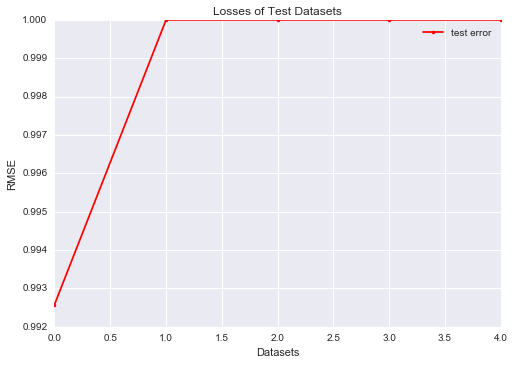

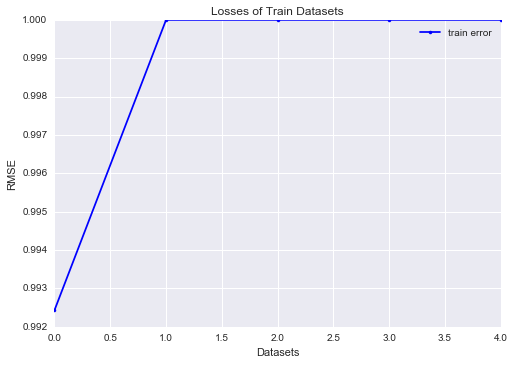

In [22]:
train_losses = []
test_losses = []
weights = []
for i in range(len(train_datasets)):
    train_dataset = train_datasets[i]
    test_dataset = test_datasets[i]
    dataset_name = datasets_names[i]
        
    train_rmse, test_rmse, weight = logistic_regression_dataset_single_gamma_test(y_train, y_test, train_dataset, test_dataset, max_iters, gamma, dataset_name)
    weights.append(weight)
    train_losses = np.append(train_losses, train_rmse)
    test_losses = np.append(test_losses, test_rmse)

plt.figure(1)
plt.title("Losses of Test Datasets")
plt.plot(range(len(train_datasets)), test_losses, marker=".", color='r', label='test error')
plt.xlabel("Datasets")
plt.ylabel("RMSE")
plt.grid(True)
plt.legend()
plt.figure(2)
plt.title("Losses of Train Datasets")
plt.plot(range(len(train_datasets)), train_losses, marker=".", color='b', label='train error')
plt.xlabel("Datasets")
plt.ylabel("RMSE")
plt.grid(True)
plt.legend()

## Least Squares

### Gradient Descent

In [23]:
max_iters= 1000
gamma = 1.2e-3
initial_w = np.zeros(squared_tx_normalized_train.shape[1])
gradient_w, train_rmse = least_squares_GD(y_train, squared_tx_normalized_train, initial_w, max_iters, gamma)
test_rmse = compute_RMSE(y_test, squared_tx_normalized_test, gradient_w)
print(train_rmse)
print(test_rmse)

0.817718116159
0.819167942314


Gradient Descent for Squared: execution time=3.630 seconds. Train RMSE Loss=nan, Test RMSE Loss=nan
Gradient Descent for Squared Normalized: execution time=3.741 seconds. Train RMSE Loss=1.88456806818358e+110, Test RMSE Loss=1.8821605514066288e+110


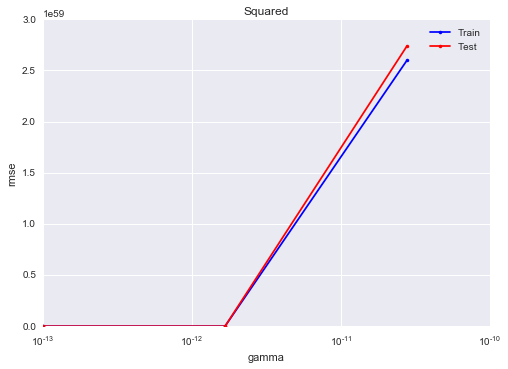

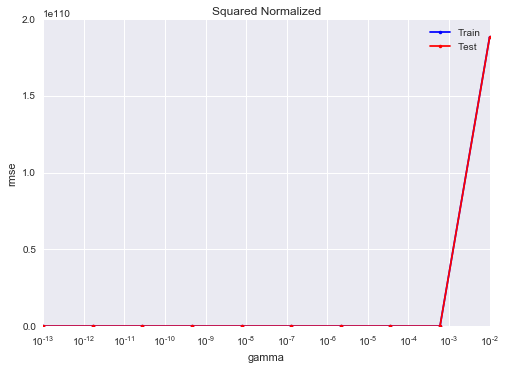

In [24]:
max_iters = 100
gammas = np.logspace(-13, -2, 10)
for i in range(len(squared_datasets)):
    # Parameters
    train_dataset = squared_datasets[i]
    test_dataset = squared_test_datasets[i]
    dataset_name = squared_datasets_names[i]
    figure_id = i
    
    least_squares_GD_gammas_test(y_train, y_test, train_dataset, test_dataset, gammas, max_iters, dataset_name, figure_id)

Lest Squares: execution time=0.030 seconds. RMSE Train Loss=0.7921819433655781, Test Loss=0.8257242745779967
Lest Squares: execution time=0.025 seconds. RMSE Train Loss=0.7893706217423152, Test Loss=6.7049998433332565


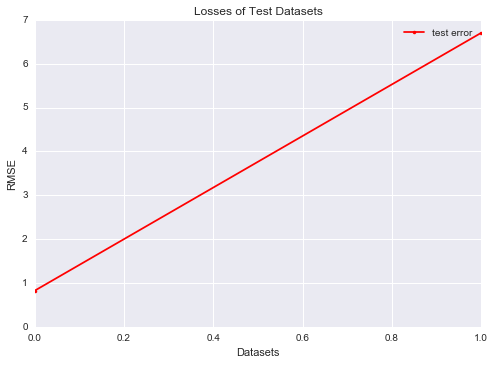

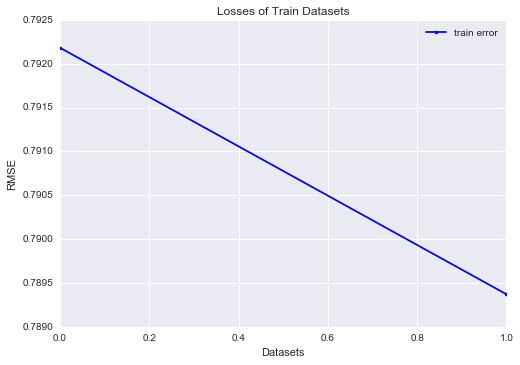

In [25]:
train_losses = []
test_losses = []
weights = []
for i in range(len(squared_datasets)):
    train_dataset = squared_datasets[i]
    test_dataset = squared_test_datasets[i]
    dataset_name = datasets_names[i]
    
    start_time = datetime.datetime.now()
    least_squares_w, train_rmse  = least_squares(y_train, train_dataset)
    weights.append(least_squares_w)

    test_rmse = compute_RMSE(y_test, test_dataset, least_squares_w)
    
    train_losses = np.append(train_losses, train_rmse)
    test_losses = np.append(test_losses, test_rmse)
    
    end_time = datetime.datetime.now()
    exection_time = (end_time - start_time).total_seconds()
    print("Lest Squares: execution time={t:.3f} seconds. RMSE Train Loss={l}, Test Loss={tl}".format(t=exection_time, l=train_rmse, tl=test_rmse))

plt.figure(1)
plt.title("Losses of Test Datasets")
plt.plot(range(len(squared_datasets)), test_losses, marker=".", color='r', label='test error')
plt.xlabel("Datasets")
plt.ylabel("RMSE")
plt.grid(True)
plt.legend()
plt.figure(2)
plt.title("Losses of Train Datasets")
plt.plot(range(len(squared_datasets)), train_losses, marker=".", color='b', label='train error')
plt.xlabel("Datasets")
plt.ylabel("RMSE")
plt.grid(True)
plt.legend()

In [26]:
least_squares_w, train_rmse = least_squares(y_train, squared_tx_normalized_train)

test_rmse = compute_RMSE(y_test, squared_tx_normalized_test, least_squares_w)
print(train_rmse, test_rmse)

0.789370621742 6.70499984333


## Ridge Regression

Ridge Regression for Squared: execution time=2.576 seconds.
Ridge Regression for Squared Normalized: execution time=2.315 seconds.


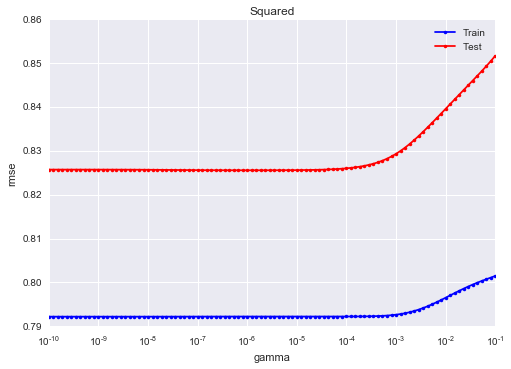

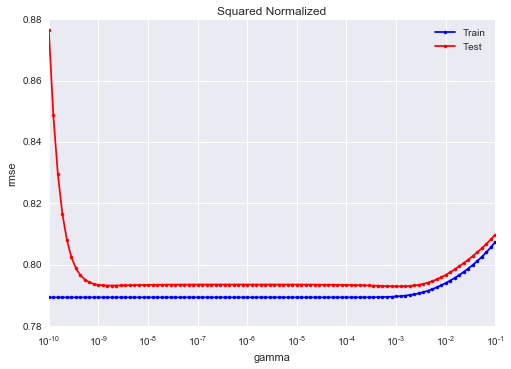

In [27]:
lambdas = np.logspace(-10, -1, 100)
for i in range(len(squared_datasets)):
    # Parameters
    train_dataset = squared_datasets[i]
    test_dataset = squared_test_datasets[i]
    dataset_name = squared_datasets_names[i]
    figure_id = i
    
    ridge_regression_dataset_lamdas_test(y_train, y_test, train_dataset, test_dataset, lambdas, dataset_name, figure_id)

In [28]:
# Parameters
lamb = 0.9e-3
ridge_regression_gradient_w, train_rmse = ridge_regression(y_train, squared_tx_train, lamb)
test_rmse = compute_RMSE(y_test, squared_tx_test, ridge_regression_gradient_w)
print(train_rmse)
print(test_rmse)

0.792568229336
0.829010074646


Ridge Regression for Original/Raw: execution time=0.009 seconds. Test RMSE Loss=0.8290100746459298, Train RMSE Loss=0.8238747779118324
Ridge Regression for Mean filled: execution time=0.010 seconds. Test RMSE Loss=0.8290100746459298, Train RMSE Loss=0.8852546619780156
Ridge Regression for Zero filled: execution time=0.009 seconds. Test RMSE Loss=0.8290100746459298, Train RMSE Loss=0.8833167563644846
Ridge Regression for NaN dropped: execution time=0.007 seconds. Test RMSE Loss=0.8290100746459298, Train RMSE Loss=0.8861021412114356
Ridge Regression for -99 filled: execution time=0.010 seconds. Test RMSE Loss=0.8290100746459298, Train RMSE Loss=0.8843040554259035


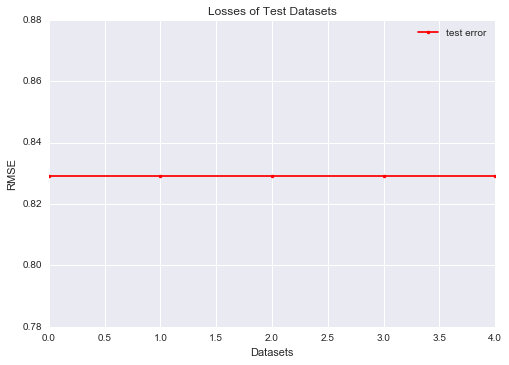

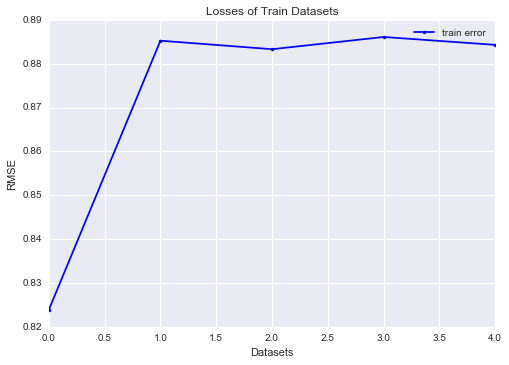

In [29]:
train_losses = []
test_losses = []
for i in range(len(train_datasets)):
    train_dataset = train_datasets[i]
    test_dataset = test_datasets[i]
    dataset_name = datasets_names[i]
    
    start_time = datetime.datetime.now()
    ridge_regression_gradient_w, ridge_regression_loss,  = ridge_regression(y_train, train_dataset, lamb)

    train_losses = np.append(train_losses, ridge_regression_loss)

    test_RMSe = compute_RMSE(y_test, test_dataset, ridge_regression_gradient_w)
    test_losses = np.append(test_losses, test_rmse)
    
    end_time = datetime.datetime.now()
    exection_time = (end_time - start_time).total_seconds()
    print("Ridge Regression for {dn}: execution time={t:.3f} seconds. Test RMSE Loss={l}, Train RMSE Loss={tl}".format(dn = dataset_name, t=exection_time, l=test_rmse, tl=ridge_regression_loss))

plt.figure(1)
plt.title("Losses of Test Datasets")
plt.plot(range(len(train_datasets)), test_losses, marker=".", color='r', label='test error')
plt.xlabel("Datasets")
plt.ylabel("RMSE")
plt.grid(True)
plt.legend()
plt.figure(2)
plt.title("Losses of Train Datasets")
plt.plot(range(len(train_datasets)), train_losses, marker=".", color='b', label='train error')
plt.xlabel("Datasets")
plt.ylabel("RMSE")
plt.grid(True)
plt.legend()

## Cross validation


[ 0.82389659  0.8246067   0.8243188   0.82361836  0.82460442  0.82432207
  0.82429457  0.82448319  0.82419475  0.82400629]
[ 0.82737929  0.82100899  0.82358468  0.82992652  0.82104344  0.82366705
  0.82381502  0.82210155  0.82469649  0.82641465]
Cross Validation: execution time=2.227 seconds.


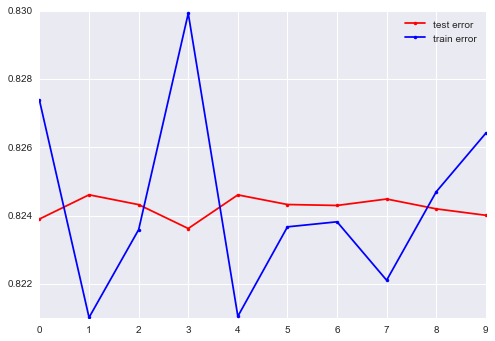

In [30]:
from plots import cross_validation_visualization

subset_y = y
subset_tx = tx


# Define the parameters of the algorithm.
seed = 1
k_fold = 10
lambdas = np.logspace(-16, 2, 1)

rmse_tr = []
rmse_te = []
# weights = np.empty((0,subset_tx.shape[1]), float)
start_time = datetime.datetime.now()

for lambd in np.nditer(lambdas):
    loss_tr, loss_te = cross_validation_mat(subset_y, subset_tx, k_fold, seed, lambd)
    rmse_tr = np.append(rmse_tr, loss_tr)
    rmse_te = np.append(rmse_te, loss_te)
#     weights = np.vstack((weights, w))
        
end_time = datetime.datetime.now()
exection_time = (end_time - start_time).total_seconds()

print("Cross Validation: execution time={t:.3f} seconds.".format(t=exection_time))
#cross_validation_visualization(lambdas, rmse_tr, rmse_te)

In [ ]:
OUTPUT_PATH = '../data/logistic_regression_cross_validation_submission.csv' # TODO: fill in desired name of output file for submission
weights_pred = least_squares_w #for squared_tx_normalized_train
y_pred = predict_labels(weights_pred, squared_tx_normalized_pred)
create_csv_submission(ids_pred, y_pred, OUTPUT_PATH)